In [1]:
# Dependencies
import tweepy
import pandas as pd
import json
import numpy as np
import time
from datetime import datetime
from email.utils import parsedate_tz
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_idx=[]
media_list=[]
date_list=[]

# Target User Accounts
target_user = ("BBC","CBS", "CNN",  "fox","nytimes")
now=datetime.now().date().strftime('%m/%d/%y')

# Loop through each user
for user in target_user:
    
    ctr=0

    # Get all tweets from home feed
    public_tweets = api.user_timeline(user, count = 100)

     # Loop through all tweets
    for tweet in public_tweets:
        #print (tweet)
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]

        # Add each value to the appropriate array
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        media_list.append(tweet["user"]['screen_name'])
        
        then=datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')
        date_list.append(then)
        tweet_idx.append(ctr)
       # tweet_idx.append(ctr)
        ctr+=1


In [4]:
#List of colors for plotting
my_colors = ["lightblue","green","red","blue","yellow"]

#convert to DataFrame
user_df=pd.DataFrame({"Media Source":media_list,
                          "Compound":compound_list,
                             "Positive":positive_list,
                             "Negative":negative_list,
                             "Neutral":neutral_list,
                             "Tweets Ago":tweet_idx,
                            # "Name":media_names,
                             "Created":date_list
                             }
                            )
  

# Saving DataFrame to CSV file

In [5]:
#Saving dataframe to CSV file
user_df.head()
user_df.to_csv('output/'+"MediaTweets_data.csv")

# Printing count of tweets for each Media

In [6]:
#Printing count of tweets for each Media
for media in target_user:
    media_display=((((media,'New York Times')[media=='nytimes']),'Fox')[media=='fox'])
    print(f" {media_display}   #of Tweets={len(user_df[user_df['Media Source']==media])}")

 BBC   #of Tweets=100
 CBS   #of Tweets=100
 CNN   #of Tweets=100
 Fox   #of Tweets=100
 New York Times   #of Tweets=100


# Plotting Scatter Plot 

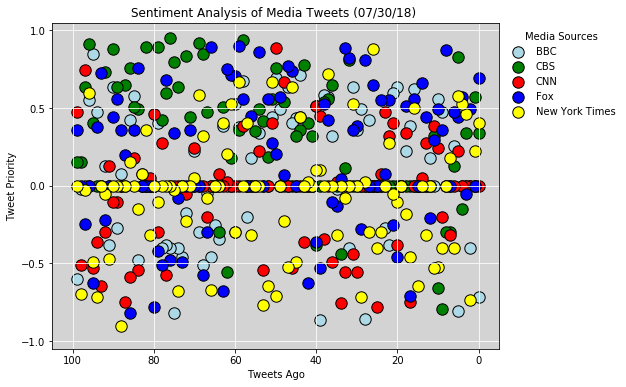

In [7]:
#Plotting scatter plot 
plt.figure(figsize=(8, 6))
plt.grid(True,color="white")
plt.gca().set_facecolor("lightgrey")

plt.xlim(100,0)
i=0
for media in target_user:
    #print(media)
    media_df=user_df[user_df['Media Source']==media]
    #print(media_df['Name'].iloc[0])
    media_display=((((media,'New York Times')[media=='nytimes']),'Fox')[media=='fox'])
    plt.scatter( media_df["Tweets Ago"],media_df["Compound"],  label=media_display,s=130,edgecolors='k',alpha=1,color=my_colors[i])
    i+=1
plt.legend(title='Media Sources',bbox_to_anchor=(1, 1),edgecolor='w')
plt.ylabel('Tweet Priority')
plt.xlabel('Tweets Ago')
plt.title(f'Sentiment Analysis of Media Tweets ({now}) ')
plt.ylim(-1.05, 1.05)
plt.yticks(np.arange(-1, 1.05, step=0.5))
plt.xlim(105, -5)
plt.show()
plt.savefig('output/'+'TweetPriority_By_time.png',bbox_inches='tight')

# Plotting Bar Chart for each Media/User 

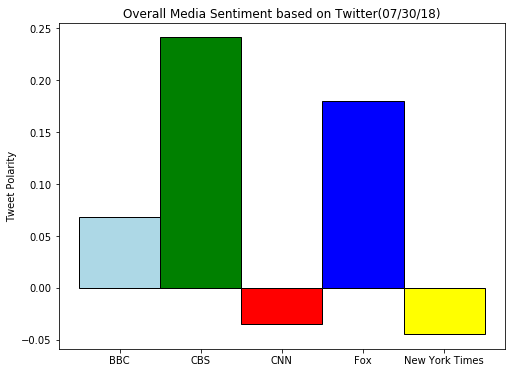

In [8]:

plt.figure(figsize=(8, 6))
my_colors = ["lightblue","green","red","blue","yellow"]
x=0
for media  in target_user:
    grp_df=user_df[user_df['Media Source']==media]
    media_display=((((media,'New York Times')[media=='nytimes']),'Fox')[media=='fox'])
    plt.bar(media_display,grp_df["Compound"].mean(),width=1,color=my_colors[x],edgecolor='k')
    #print(f'{media_display} {grp_df["Compound"].mean()}')
    x+=1
    
 
plt.ylabel('Tweet Polarity')
plt.title(f'Overall Media Sentiment based on Twitter({now})')
plt.savefig('output/'+'TweetPriority_By_Media.png',bbox_inches='tight')

# Analysis-Three Observable Trends 

## 1. CBS and FOX has mostly positive tweets (Bar Chart)
## 2. New York Times has mostly negative tweets(Bar Chart)
## 3. Over all positive tweets outnumbers the negative tweets, as visible in the plot density on positive side of the axis (Scatter plot Chart)